In [1]:
import torch, os
import torch.nn.functional as F
from torch import sqrt
import lightning as pl
from einops import rearrange
import matplotlib.pyplot as plt
from tqdm import tqdm
from einops import rearrange

from torchvision.utils import save_image, make_grid
from torchvision import transforms
from torchvision.datasets import MNIST

from modules.trainers.VariationalDM import VDM

In [2]:
model = VDM.load_from_checkpoint('/home/exouser/genmod/genmod/lr7jzv6a/checkpoints/last.ckpt')
model.eval()
print('num timesteps - ', model.n_T)

num timesteps -  1000


sampling loop time step: 100%|██████████| 1000/1000 [00:03<00:00, 266.05it/s]


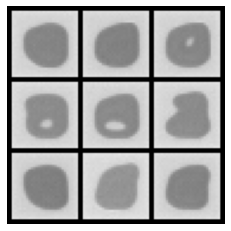

In [3]:
device = "cuda:0"

torch.cuda.empty_cache()

model = model.to(device)

gen_imgs = []
for _ in range(9):
    x_i = torch.randn((1,1,28,28)).to(device)  # x_T ~ N(0, 1), sample initial noise
    x_0 = model.sample(x_i)

    gen_imgs.append(x_0.squeeze(0).detach().cpu())
    
gen_imgs = rearrange(gen_imgs, 'b c h w -> b c h w')
# create grid
grid = make_grid(gen_imgs*-1 + 1, nrow=3, padding=2)

# plot grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()